In [1]:
import pandas as pd
import numpy as np  

In [2]:
df_hot_days = pd.read_csv('district_hot_days.csv')

In [3]:
df_hot_days

,DISTRICT,hot_days
0,LEHRI,3889
1,NASIRABAD,3855
2,JAFFARABAD,3799
3,SUKKUR,3686
4,SOHBATPUR,3683
...,...,...
156,SHANGLA,0
157,SWAT,0
158,UPPER KOHISTAN,0
159,TORDHER,0


In [4]:
df_district_temp = pd.read_csv('district_temperatures.csv')

In [5]:
df_district_temp

,DISTRICT,temperature
0,LEHRI,40.47
1,NASIRABAD,39.94
2,JAFFARABAD,39.56
3,JHAL MAGSI,39.40
4,SUKKUR,39.23
...,...,...
156,KORANGI,NaN
157,KORANGI CREEK CANTONMENT,NaN
158,MALIR CANTONMENT,NaN
159,MANORA CANTONMENT,NaN


In [6]:
df = pd.merge(df_hot_days, df_district_temp, on='DISTRICT', how='inner')

In [7]:
df['DISTRICT'] = df['DISTRICT'].str.lower()
df

,DISTRICT,hot_days,temperature
0,lehri,3889,40.47
1,nasirabad,3855,39.94
2,jaffarabad,3799,39.56
3,sukkur,3686,39.23
4,sohbatpur,3683,39.18
...,...,...,...
156,shangla,0,21.90
157,swat,0,15.66
158,upper kohistan,0,14.74
159,tordher,0,NaN


In [8]:
df_codes = pd.read_csv('district_codes.csv')    

In [10]:
df_names_corrected = pd.read_csv('df_names_corrected.csv')

In [11]:
df_names_corrected

,DISTRICT,HOT_DAYS,TEMP
0,lehri,3889,40.47
1,Nasirabad/ Tamboo,3855,39.94
2,jaffarabad,3799,39.56
3,sukkur,3686,39.23
4,sohbatpur,3683,39.18
...,...,...,...
141,shangla,0,21.90
142,bagh,0,22.77
143,batagram,0,23.23
144,poonch,0,24.25


In [13]:
df_codes['DISTRICT'] = df_codes['DISTRICT'].str.lower()

In [14]:
df_codes

,DISTRICT,sb2q2b
0,abbottabad,101
1,astore,601
2,attock,201
3,awaran,401
4,badin,301
...,...,...
132,upper dir,132
133,vehari,237
134,washuk,431
135,zhob,432


In [15]:
df_names_corrected['DISTRICT'] = df_names_corrected['DISTRICT'].str.lower()

In [16]:
df_final = pd.merge(df_names_corrected, df_codes, on='DISTRICT', how='inner')

In [17]:
df_final

,DISTRICT,HOT_DAYS,TEMP,sb2q2b
0,nasirabad/ tamboo,3855,39.94,420
1,jaffarabad,3799,39.56,408
2,sukkur,3686,39.23,324
3,sohbatpur,3683,39.18,430
4,jacobabad,3674,39.10,305
...,...,...,...,...
131,muzaffarabad,0,20.99,507
132,shangla,0,21.90,126
133,bagh,0,22.77,501
134,batagram,0,23.23,104


In [18]:
df_final.to_csv('final.csv', index=False)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DISTRICT  136 non-null    object 
 1   HOT_DAYS  136 non-null    int64  
 2   TEMP      136 non-null    float64
 3   sb2q2b    136 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.4+ KB


In [21]:
df_temp_null = df_final[df_final["TEMP"].isnull()]  
df_temp_null

,DISTRICT,HOT_DAYS,TEMP,sb2q2b


In [22]:
print(len(df_temp_null))

0


In [24]:
df_final.sort_values(by='TEMP', ascending=True)

,DISTRICT,HOT_DAYS,TEMP,sb2q2b
117,ghanchi,0,-0.55,604
118,biltistan,0,3.31,602
119,ghizer,0,7.17,605
120,chitral,0,8.24,107
121,astore,0,8.44,601
...,...,...,...,...
3,sohbatpur,3683,39.18,430
2,sukkur,3686,39.23,324
8,jhal magsi,3524,39.40,409
1,jaffarabad,3799,39.56,408


Sir se puchty

In [27]:
df_final[df_final['TEMP']<10]

,DISTRICT,HOT_DAYS,TEMP,sb2q2b
117,ghanchi,0,-0.55,604
118,biltistan,0,3.31,602
119,ghizer,0,7.17,605
120,chitral,0,8.24,107
121,astore,0,8.44,601


<Axes: ylabel='Frequency'>

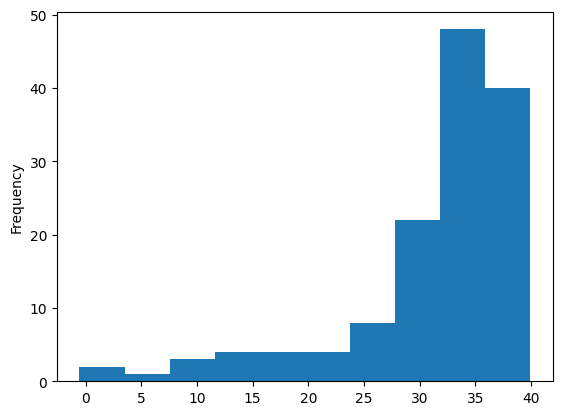

In [28]:
df_final.TEMP.plot(kind='hist', bins=10)